# Clustering

Today we will be looking at clustering algorithms.  This notebook is based on those found [here](https://github.com/justmarkham/DAT8/blob/master/notebooks/19_clustering.ipynb) and [here](https://gea.esac.esa.int/archive-help/tutorials/python_cluster/index.html)

## Outline:

1. K-means clustering
2. Clustering evaluation
3. Bottom-Up Heirarchical Clustering
4. Application to Gaia Data

To practice using the clustering algorithms, we will start out using our trusty iris data set.

In [ ]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


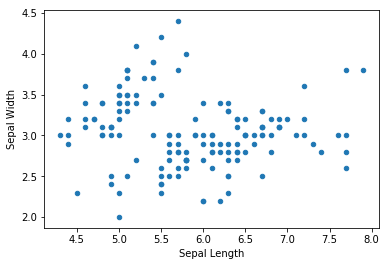

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# create a scatter plot of sepal length vs sepal width
fig, ax = plt.subplots()
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', ax=ax)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width');


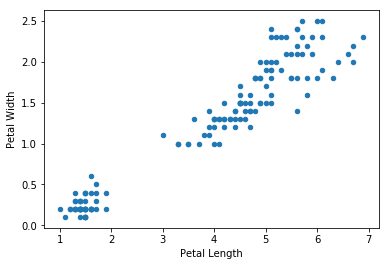

In [ ]:
# create a scatter plot of petal length vs petal width
fig, ax = plt.subplots()
iris.plot(kind='scatter', x='petal_length', y='petal_width', ax=ax)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width');

Looking at the above plots, we can tell by eye that there are a few clusters of data points.  We know that there are 3 species present and expect that the clusters are associated with the different species.  However, clustering is an *unsupervised* technique for exploring our data so we will not use the information about the species.

In [ ]:
# define X
X = iris.drop('species', axis=1)

What happened to y?

## Part 1: K-means clustering

The first clustering algorithm we will try is K-means clustering.  This method requires you to specify K, the number of clusters.

In [ ]:
# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [ ]:
# review the cluster labels
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# save the cluster labels and sort by cluster
iris['cluster'] = km.labels_
iris.sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
74,6.4,2.9,4.3,1.3,Iris-versicolor,0
83,6.0,2.7,5.1,1.6,Iris-versicolor,0
82,5.8,2.7,3.9,1.2,Iris-versicolor,0
81,5.5,2.4,3.7,1.0,Iris-versicolor,0
80,5.5,2.4,3.8,1.1,Iris-versicolor,0
79,5.7,2.6,3.5,1.0,Iris-versicolor,0
78,6.0,2.9,4.5,1.5,Iris-versicolor,0
76,6.8,2.8,4.8,1.4,Iris-versicolor,0
75,6.6,3.0,4.4,1.4,Iris-versicolor,0
73,6.1,2.8,4.7,1.2,Iris-versicolor,0


In [ ]:
# review the cluster centers
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# calculate the mean of each feature for each cluster
iris.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


In [ ]:
# Task 1: Answer the following question: 
# What is the relationship between the cluster centers 
# and the feature means per cluster?


#Cluster center 2 has the highest means and therefore on average has bigger sepals (except for sepal width) and petals.

#Cluster Center 0 has the second highest means for most categories. However, it has the smallest sepal width on average.

#Cluster Center 1 has the lowest means, however it has the highest sepal width

In [ ]:
# save the DataFrame of cluster centers
centers = iris.groupby('cluster').mean()

In [ ]:
# tweak the plot font size
plt.rcParams['font.size'] = 14

In [ ]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

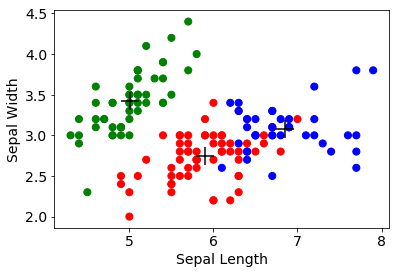

In [ ]:
# scatter plot of sepal width versus sepal length, 
# colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(iris.sepal_length, iris.sepal_width, c=colors[iris.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.sepal_length, centers.sepal_width, linewidths=3, marker='+', 
            s=300, c='black')

# add labels
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

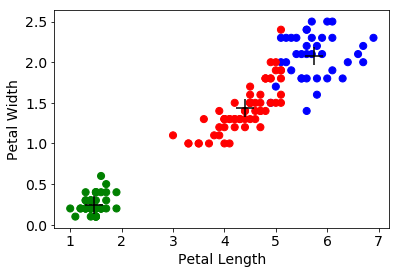

In [ ]:
# scatter plot of petal width versus petal length, 
# colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(iris.petal_length, iris.petal_width, c=colors[iris.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.petal_length, centers.petal_width, linewidths=3, marker='+', 
            s=300, c='black')

# add labels
plt.xlabel('Petal Length')
plt.ylabel('Petal Width');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0967813fd0>,
      dtype=object)

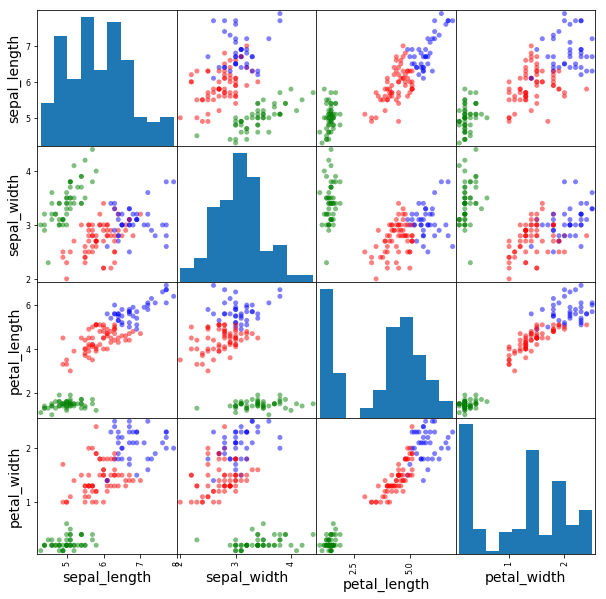

In [ ]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.plotting.scatter_matrix(X, c=colors[iris.cluster], figsize=(10,10), s=100)

### Repeat with scaled data

Our iris data set is rather unique in that all of the features are fairly similar.  They are all measurements of roughly the same magnitude and have the same units.  Often your features will be very different and have very different sizes.  Then it becomes very important to rescale the data so that more than 1 or 2 features dominate the clustering.

In [ ]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [ ]:
# save the cluster labels and sort by cluster
iris['cluster'] = km.labels_
iris.sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
147,6.5,3.0,5.2,2.0,Iris-virginica,0
75,6.6,3.0,4.4,1.4,Iris-versicolor,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0
130,7.4,2.8,6.1,1.9,Iris-virginica,0
131,7.9,3.8,6.4,2.0,Iris-virginica,0
132,6.4,2.8,5.6,2.2,Iris-virginica,0
70,5.9,3.2,4.8,1.8,Iris-versicolor,0
135,7.7,3.0,6.1,2.3,Iris-virginica,0
136,6.3,3.4,5.6,2.4,Iris-virginica,0
65,6.7,3.1,4.4,1.4,Iris-versicolor,0


What are the "characteristics" of each cluster?

In [ ]:
# review the cluster centers
iris.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.418000,1.464000,0.244000
2,5.801887,2.673585,4.369811,1.413208


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09673f1ac8>,
      dtype=object)

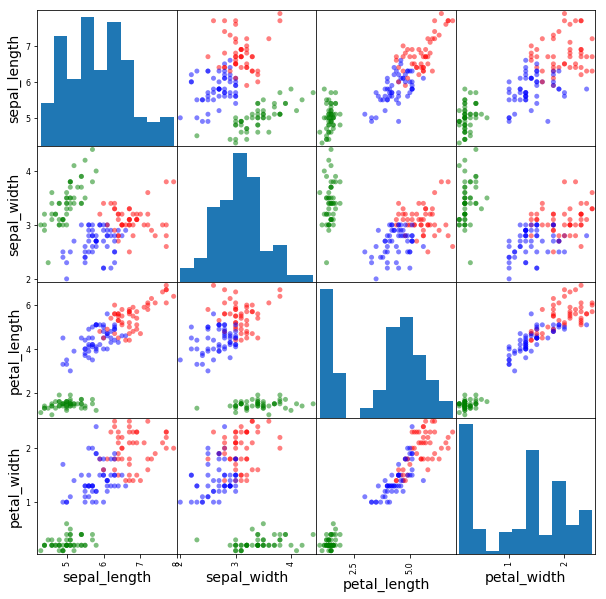

In [ ]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.plotting.scatter_matrix(X, c=colors[iris.cluster], figsize=(10,10), s=100)

Have the cluster centers changed very much after the scaling?

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [ ]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.4589717867018717

In [ ]:
# calculate SC for K=2 through K=9
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

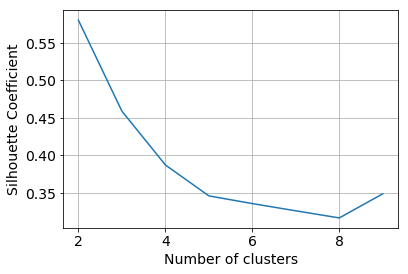

In [ ]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
# Task 2: Carry out K-means clustering with 4 clusters on
# the scaled data and output a scatter plot matrix showing
# the new cluster assignments.

km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)

from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.38724679456128813

In [ ]:
iris['cluster'] = km.labels_
iris.sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
74,6.4,2.9,4.3,1.3,Iris-versicolor,0
63,6.1,2.9,4.7,1.4,Iris-versicolor,0
62,6.0,2.2,4.0,1.0,Iris-versicolor,0
61,5.9,3.0,4.2,1.5,Iris-versicolor,0
60,5.0,2.0,3.5,1.0,Iris-versicolor,0
59,5.2,2.7,3.9,1.4,Iris-versicolor,0
94,5.6,2.7,4.2,1.3,Iris-versicolor,0
57,4.9,2.4,3.3,1.0,Iris-versicolor,0
95,5.7,3.0,4.2,1.2,Iris-versicolor,0
55,5.7,2.8,4.5,1.3,Iris-versicolor,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0966ff2278>,
      dtype=object)

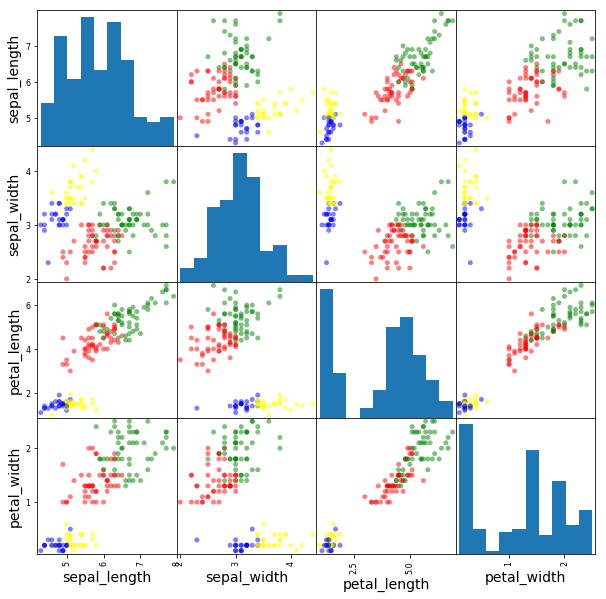

In [ ]:
pd.plotting.scatter_matrix(X, c=colors[iris.cluster], figsize=(10,10), s=100)

In [ ]:
iris['cluster'] = km.labels_
iris.sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
74,6.4,2.9,4.3,1.3,Iris-versicolor,0
63,6.1,2.9,4.7,1.4,Iris-versicolor,0
62,6.0,2.2,4.0,1.0,Iris-versicolor,0
61,5.9,3.0,4.2,1.5,Iris-versicolor,0
60,5.0,2.0,3.5,1.0,Iris-versicolor,0
59,5.2,2.7,3.9,1.4,Iris-versicolor,0
94,5.6,2.7,4.2,1.3,Iris-versicolor,0
57,4.9,2.4,3.3,1.0,Iris-versicolor,0
95,5.7,3.0,4.2,1.2,Iris-versicolor,0
55,5.7,2.8,4.5,1.3,Iris-versicolor,0


## Part 3: Bottom-Up Heirarchical Clustering

Next we will try using bottom-up heirarchical clustering.  This type of clustering is called agglomerative clustering by scikit-learn.  Besides specifing the number of final clusters, we need to specify the method for merging smaller clusters into larger ones.  The available methods are:
1. **ward** minimizes the variance of the clusters being merged.
2. **average** uses the average of the distances of each observation of the two sets.
3. **complete** or maximum linkage uses the maximum distances between all observations of the two sets. (This leads to more compact clusters)
4. **single** uses the minimum of the distances between all observations of the two sets. (This leads to more thin, ropey clusters)

In [ ]:
# Agglomerative Clustering with 3 clusters and "complete" merging
from sklearn.cluster import AgglomerativeClustering as AGGC
ag = AGGC(n_clusters=3, linkage="complete")
ag.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [ ]:
# review the cluster labels
ag.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# save the cluster labels and sort by cluster
iris['cluster'] = ag.labels_
iris.sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
74,6.4,2.9,4.3,1.3,Iris-versicolor,0
112,6.8,3.0,5.5,2.1,Iris-virginica,0
111,6.4,2.7,5.3,1.9,Iris-virginica,0
110,6.5,3.2,5.1,2.0,Iris-virginica,0
109,7.2,3.6,6.1,2.5,Iris-virginica,0
108,6.7,2.5,5.8,1.8,Iris-virginica,0
107,7.3,2.9,6.3,1.8,Iris-virginica,0
105,7.6,3.0,6.6,2.1,Iris-virginica,0
104,6.5,3.0,5.8,2.2,Iris-virginica,0
103,6.3,2.9,5.6,1.8,Iris-virginica,0


In [ ]:
# review the cluster centers
iris.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.472727,2.990909,5.183117,1.815584
1,5.016327,3.440816,1.467347,0.242857
2,5.512500,2.466667,3.866667,1.170833


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0967b383c8>,
      dtype=object)

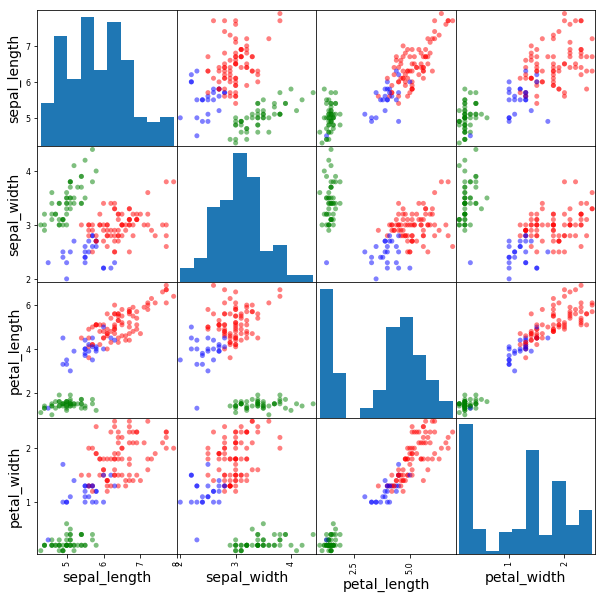

In [ ]:
# scatter plot matrix of Agglomerative cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.plotting.scatter_matrix(X, c=colors[iris.cluster], figsize=(10,10), s=100)

In [ ]:
# Task 3: Repeat the clustering analysis and plotting above using
# Agglomerative Clustering with 3 clusters and "single" merging

from sklearn.cluster import AgglomerativeClustering as AGGC
ag1 = AGGC(n_clusters=3, linkage="single")
ag1.fit(X_scaled)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [ ]:
ag1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
iris['cluster'] = ag1.labels_
iris.sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
74,6.4,2.9,4.3,1.3,Iris-versicolor,0
96,5.7,2.9,4.2,1.3,Iris-versicolor,0
97,6.2,2.9,4.3,1.3,Iris-versicolor,0
98,5.1,2.5,3.0,1.1,Iris-versicolor,0
99,5.7,2.8,4.1,1.3,Iris-versicolor,0
100,6.3,3.3,6.0,2.5,Iris-virginica,0
101,5.8,2.7,5.1,1.9,Iris-virginica,0
95,5.7,3.0,4.2,1.2,Iris-versicolor,0
102,7.1,3.0,5.9,2.1,Iris-virginica,0
104,6.5,3.0,5.8,2.2,Iris-virginica,0


In [ ]:
iris.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.262000,2.872000,4.906000,1.676000
1,5.016327,3.440816,1.467347,0.242857
2,4.500000,2.300000,1.300000,0.300000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0966b13588>,
      dtype=object)

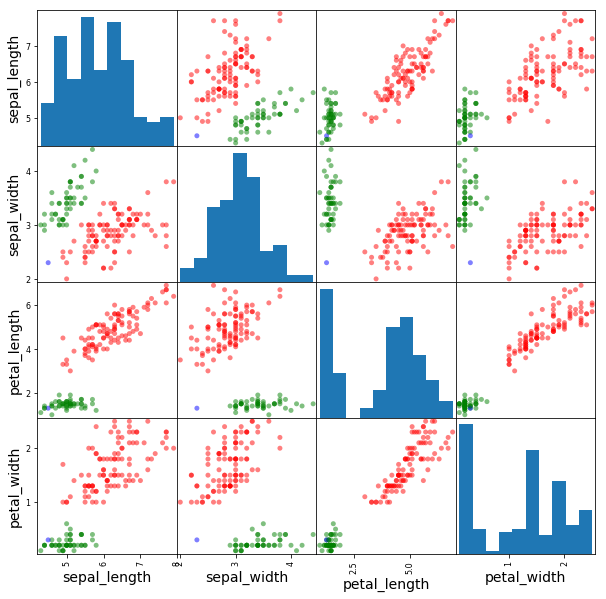

In [ ]:
pd.plotting.scatter_matrix(X, c=colors[iris.cluster], figsize=(10,10), s=100)

## Clustering Gaia Data of the Pleadies

Next we will be using data from the Gaia mission to explore an open star cluster called the Pleadies.  The brightest members of this cluster are easily visible by eye.  Open clusters consist of a few thousand stars that were all formed in the collapse of the same dust cloud and so are all roughly the same age.

<img src='http://en.es-static.us/upl/2018/11/pleiades-nov-2018-Fred-Espenak-Arizona-e1542547236557.jpg' width = 300>

The seven brightest stars of the Pleadies Cluster are known as the Seven Sisters. They are arranged in a shape that looks a bit like a small pot.

To get the Gaia data, we will first need to import the required modules.

In [ ]:
# Uncomment the line below and run this cell only if using Colaboratory
!pip install astroquery

In [ ]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [ ]:
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

Do the following to load and look at the available Gaia table names:

In [ ]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

Retrieving tables...
Parsing tables...
Done.
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighbourhood
gaiadr1.gaiadr1.tma

Next, we retrieve all the available data in the region of interest.

To do this we perform an asynchronous query (asynchronous rather than synchronous queries should be performed when retrieving more than 2000 rows) centred on the Pleides (coordinates: 56.75, +24.1167) with a search radius of 2 degrees and save the results to a file.

Note: The query to the archive is with ADQL (Astronomical Data Query Language). For a description of ADQL and more examples see the Gaia DR1 ADQL cookbook: https://gaia.ac.uk/data/gaia-data-release-1/adql-cookbook

Note: the following cell will take a while to run.

In [ ]:
job = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1;" \
, dump_to_file=True)

print (job)

Jobid: 1555959338467O
Phase: COMPLETED
Owner: None
Output file: async_20190422185538.vot
Results: None


Inspect the output table and number of rows (around 1e5 results are found):

This cell will also take a while to run.

In [ ]:
r = job.get_results()
print (r['source_id'])

    source_id    
-----------------
66926207631181184
66818318054203520
66917823855519360
66830859358837888
66809423175240448
66944761890240000
66980191076373760
66781621852927232
66827805636652928
66947545031024640
              ...
66649989694512256
65666785781176576
64014803920669568
64137880504644992
66542306274948224
64005909043397504
66689881351473664
66436615718993792
65645757620918912
66718434293042560
64103559419447296
Length = 98538 rows


Our results are stored in the variable r.

r seems to behave a bit like a Pandas DataFrame.  Is it?

In [ ]:
type(r)

astropy.table.table.Table

No.  It is a an object called an astropy.table.  You can learn more about them [here](http://docs.astropy.org/en/stable/table/)

Let's take a look at what is stored in this table.  The info attribute will give us bucketloads of information.

In [ ]:
r.info

<Table masked=True length=98538>
             name              dtype      unit     format                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Next we will pull out just the information that we need going forward, convert the astropy table to a Pandas DataFrame and drop any rows where information is missing. The information that we are pulling out is the following:

- **dec, ra** = declination and right ascension - these are like latitude and longitude for sky location
- **parallax** = a measure of how far the star is from Earth
- **pmdec, pmra** = the star's "proper motion" in the declination and right ascension directions.  The proper motion is how fast the star is moving.
- **phot_g_mean_mag** = the brightness of a star as seen through a filter that lets through green light.  The lower the magnitude, the brighter the star.  

In [ ]:
feature_cols = ['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'phot_g_mean_mag']
stardf = r[feature_cols].to_pandas()
stardf = stardf.dropna()
stardf.size

2928

Just under 3000 stars made our cut.

Next, we will plot star positions in terms of right ascension and declination so we can see how they are positioned.

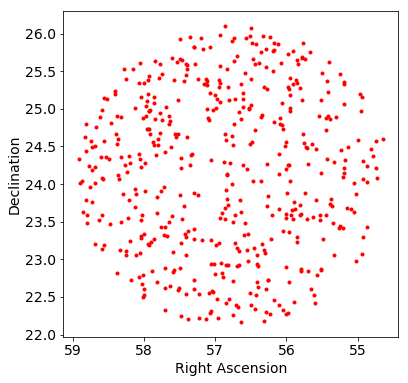

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.invert_xaxis()
plt.scatter(stardf['ra'], stardf['dec'], color='r', marker = '.')
plt.xlabel('Right Ascension')
plt.ylabel('Declination');

Where are the seven sisters? There are so many stars in our sample, they are really hard to pick out.  Let's try plotting just the very brightest stars.

In [ ]:
very_brightest = r[r['phot_g_mean_mag']<7.1]

len(very_brightest)

24

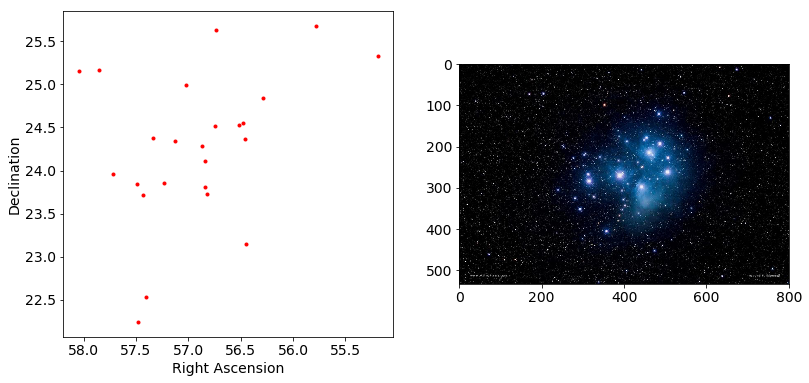

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
plt.subplot(1,2,1)
plt.scatter(very_brightest['ra'], very_brightest['dec'], color='r', marker='.')
plt.gca().invert_xaxis()
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.subplot(1,2,2)
img=plt.imread('https://www.andrews.edu/~tzs/DataScience/pleiades-nov-2018-Fred-Espenak-Arizona-e1542547236557.png')
plt.imshow(img);

Not all of the seven sisters are in our data.  Gaia actually has a hard time seeing the brightest stars because they are too bright for the instruments!  If you look carefully though, you can find a mapping between some of these stars and the picture.

Even more important than the positions of the stars in determining if the stars are part of the same open cluster, is how the stars are moving.  Open cluster stars were all born together and so they travel together too, orbiting the galactic center.

We should also make a plot of our stars' proper motions to see which ones are moving together.

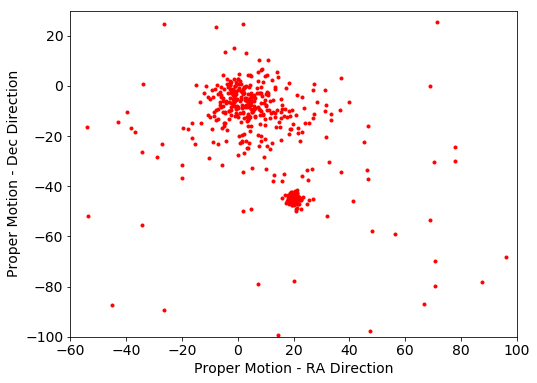

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim([-100, 30])
ax.set_xlim([-60,100])
plt.scatter(stardf['pmra'], stardf['pmdec'], color='r', marker='.')
plt.xlabel('Proper Motion - RA Direction')
plt.ylabel('Proper Motion - Dec Direction');

Now we are ready to do our clustering.  Let's try K-means with 2 clusters.

In [ ]:
# Pick the features to cluster on
feature_cols = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
X = stardf[feature_cols]


# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# K-means with 2 clusters on scaled data
km = KMeans(n_clusters=2, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [ ]:
# save the cluster labels 
stardf['cluster'] = km.labels_

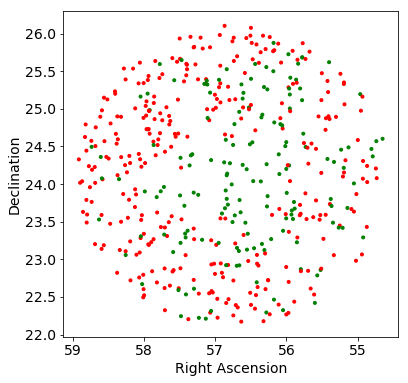

In [ ]:
# scatter plot of dec vs ra, 
# colored by cluster (0=red, 1=green)
fig, ax = plt.subplots(figsize=(6,6))
ax.invert_xaxis()
plt.scatter(stardf.ra, stardf.dec, c=colors[stardf.cluster], marker='.')
plt.xlabel('Right Ascension')
plt.ylabel('Declination');

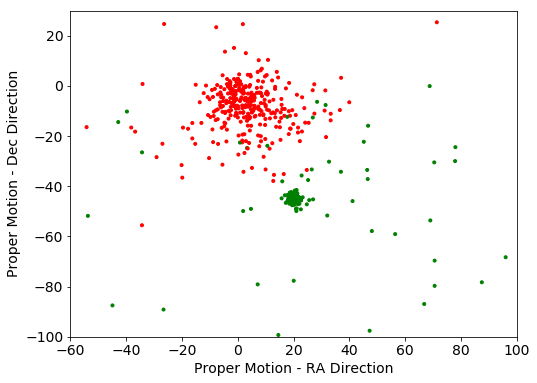

In [ ]:
# scatter plot of pmdec vs pmra, 
# colored by cluster (0=red, 1=green)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim([-100, 30])
ax.set_xlim([-60,100])
plt.scatter(stardf.pmra, stardf.pmdec, c=colors[stardf.cluster], marker='.')
plt.xlabel('Proper Motion - RA Direction')
plt.ylabel('Proper Motion - Dec Direction');

Let's calculate a Silhouette Coefficient for different values of k to see if some produce better clusters than others.

In [ ]:
# calculate SC for K=2 through K=9
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

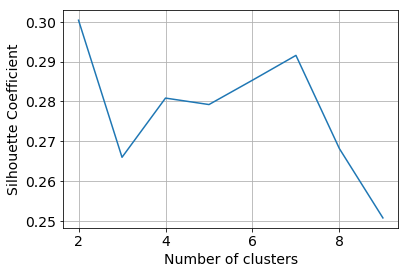

In [ ]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
# Task4: Repeat k-means clustering with 3 clusters.  Also
# produce scatter plots of dec vs ra and pmdec vs pmra showing
# the new clusters.

# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [ ]:
stardf['cluster'] = km.labels_

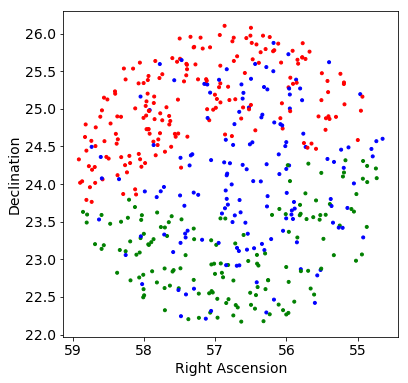

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.invert_xaxis()
plt.scatter(stardf.ra, stardf.dec, c=colors[stardf.cluster], marker='.')
plt.xlabel('Right Ascension')
plt.ylabel('Declination');

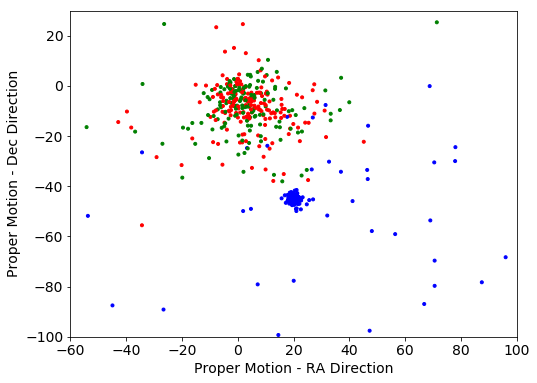

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim([-100, 30])
ax.set_xlim([-60,100])
plt.scatter(stardf.pmra, stardf.pmdec, c=colors[stardf.cluster], marker='.')
plt.xlabel('Proper Motion - RA Direction')
plt.ylabel('Proper Motion - Dec Direction');